In [1]:
import os
import pandas as pd
import numpy as np
import random
from fractions import Fraction
from datetime import datetime
from datetime import datetime, timedelta

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.optimize as opt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# Display all rows
pd.set_option('display.max_rows', None)

In [6]:
random.seed(42)
np.random.seed(42)

In [7]:
os.getcwd()

'C:\\Users\\Dell\\Documents\\MITB Analytics\\2025 Apr Term\\Data Science for Business\\Group Project'

In [8]:
root_dir = 'C:\\Users\\Dell\\Documents\\MITB Analytics\\2025 Apr Term\\Data Science for Business\\Group Project\\Dataset'

# Merged data
all_nights = pd.read_csv(root_dir + r"\airbnd_offline_merged_data.csv")
holiday = pd.read_excel(root_dir + r"\VNHoliday.xlsx")
airbnb = pd.read_csv(root_dir + r"\airbnb_2016_2025.csv")

### Datetime conversion

In [10]:
# First convert to datetime with mixed format handling
all_nights['datetime_temp'] = pd.to_datetime(all_nights['all_nights'], format='mixed', dayfirst=True)
# Then extract just the date part
all_nights['all_nights'] = all_nights['datetime_temp'].dt.date
# Drop the temporary column
all_nights.drop('datetime_temp', axis=1, inplace=True)

# First convert to datetime with mixed format handling
all_nights['datetime_temp'] = pd.to_datetime(all_nights['start_date'], format='mixed', dayfirst=True)
# Then extract just the date part
all_nights['start_date'] = all_nights['datetime_temp'].dt.date
# Drop the temporary column
all_nights.drop('datetime_temp', axis=1, inplace=True)
all_nights.head(5)

# First convert to datetime with mixed format handling
all_nights['datetime_temp'] = pd.to_datetime(all_nights['end_date'], format='mixed', dayfirst=True)
# Then extract just the date part
all_nights['end_date'] = all_nights['datetime_temp'].dt.date
# Drop the temporary column
all_nights.drop('datetime_temp', axis=1, inplace=True)
all_nights.head(5)

,start_date,end_date,nights,guest,room,amount_vnd,amount_sgd,all_nights,nightly_amount_vnd,nightly_amount_sgd,year_month,category
0,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-04-30,687083.333333,34.701178,2025-04,Airbnb Online
1,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-05-01,687083.333333,34.701178,2025-05,Airbnb Online
2,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-05-02,687083.333333,34.701178,2025-05,Airbnb Online
3,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-05-03,687083.333333,34.701178,2025-05,Airbnb Online
4,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-05-04,687083.333333,34.701178,2025-05,Airbnb Online


In [11]:
airbnb.head()

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
0,05/01/2025,NaN,Reservation,HMK33RZ5MH,04/09/2025,04/16/2025,04/23/2025,7.0,Ionut Morosan,New and central studio in Dist.1 HCMC,...,NaN,VND,4384710.0,NaN,135610.0,NaN,200000.0,4520320.0,0.0,2025
1,05/01/2025,NaN,Reservation,HMTF9ACT9T,04/18/2025,04/18/2025,04/25/2025,7.0,Dusan Slijepcevic,Spacious Studio next to Bui Vien street,...,NaN,VND,2066100.0,NaN,63900.0,NaN,200000.0,2130000.0,0.0,2025
2,05/01/2025,NaN,Reservation,HMTF9ACT9T,04/18/2025,04/18/2025,04/25/2025,7.0,Dusan Slijepcevic,Spacious Studio next to Bui Vien street,...,NaN,VND,2170472.0,NaN,67128.0,NaN,0.0,2237600.0,0.0,2025
3,05/01/2025,NaN,Resolution Adjustment,HMKHWJMZ9D,NaN,04/14/2025,04/20/2025,6.0,Chris Kopetschny,Lighting Studio near Ben Thanh market,...,NaN,VND,-200000.0,NaN,NaN,NaN,NaN,-200000.0,NaN,2025
4,05/01/2025,NaN,Reservation,HMWYCA9KZF,04/17/2025,04/23/2025,04/27/2025,4.0,Denise Bailey,Lighting Studio near Ben Thanh market,...,NaN,VND,2716000.0,NaN,84000.0,NaN,200000.0,2800000.0,0.0,2025


In [12]:
# Convert multiple columns at once
airbnb[['Booking date', 'Start date', 'End date']] = airbnb[['Booking date', 'Start date', 'End date']].apply(
    lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce')
)

airbnb.head()

,Date,Arriving by date,Type,Confirmation code,Booking date,Start date,End date,Nights,Guest,Listing,...,Reference code,Currency,Amount,Paid out,Service fee,Fast pay fee,Cleaning fee,Gross earnings,Occupancy taxes,Earnings year
0,05/01/2025,NaN,Reservation,HMK33RZ5MH,2025-04-09,2025-04-16,2025-04-23,7.0,Ionut Morosan,New and central studio in Dist.1 HCMC,...,NaN,VND,4384710.0,NaN,135610.0,NaN,200000.0,4520320.0,0.0,2025
1,05/01/2025,NaN,Reservation,HMTF9ACT9T,2025-04-18,2025-04-18,2025-04-25,7.0,Dusan Slijepcevic,Spacious Studio next to Bui Vien street,...,NaN,VND,2066100.0,NaN,63900.0,NaN,200000.0,2130000.0,0.0,2025
2,05/01/2025,NaN,Reservation,HMTF9ACT9T,2025-04-18,2025-04-18,2025-04-25,7.0,Dusan Slijepcevic,Spacious Studio next to Bui Vien street,...,NaN,VND,2170472.0,NaN,67128.0,NaN,0.0,2237600.0,0.0,2025
3,05/01/2025,NaN,Resolution Adjustment,HMKHWJMZ9D,NaT,2025-04-14,2025-04-20,6.0,Chris Kopetschny,Lighting Studio near Ben Thanh market,...,NaN,VND,-200000.0,NaN,NaN,NaN,NaN,-200000.0,NaN,2025
4,05/01/2025,NaN,Reservation,HMWYCA9KZF,2025-04-17,2025-04-23,2025-04-27,4.0,Denise Bailey,Lighting Studio near Ben Thanh market,...,NaN,VND,2716000.0,NaN,84000.0,NaN,200000.0,2800000.0,0.0,2025


In [13]:
holiday.head()

,Calendar Date,Holiday Name
0,"April 10, 2022",Hung Kings Festival
1,"April 14, 2019",Hung Kings Festival
2,"April 16, 2016",Hung Kings Festival
3,"April 18, 2024",Hung Kings Festival
4,"April 2, 2020",Hung Kings Festival


In [14]:
# Convert the "Calendar Date" column to datetime
holiday['Calendar Date'] = pd.to_datetime(holiday['Calendar Date'])

In [15]:
# If you need to extract just the date part (without time) for joining
holiday['date'] = holiday['Calendar Date'].dt.date

In [16]:
holiday.head()

,Calendar Date,Holiday Name,date
0,2022-04-10,Hung Kings Festival,2022-04-10
1,2019-04-14,Hung Kings Festival,2019-04-14
2,2016-04-16,Hung Kings Festival,2016-04-16
3,2024-04-18,Hung Kings Festival,2024-04-18
4,2020-04-02,Hung Kings Festival,2020-04-02


# Feature Engineering

In [18]:
import duckdb

# Create a DuckDB in-memory connection
con = duckdb.connect()

In [19]:
con.register("all_nights", all_nights)

In [20]:
con.register("holiday", holiday)

In [21]:
con.register("airbnb", airbnb)

In [22]:
booking_date = con.execute("""
select a.*
        ,case when a.category = 'Airbnb Online' then b."Booking date" 
              else a.start_date - interval '30' day
        end as booking_date
from all_nights a 
left join airbnb b on a.guest = b."Guest" and a.start_date = b."Start date"
;
""").df()

booking_date.head()

,start_date,end_date,nights,guest,room,amount_vnd,amount_sgd,all_nights,nightly_amount_vnd,nightly_amount_sgd,year_month,category,booking_date
0,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-04-30,687083.333333,34.701178,2025-04,Airbnb Online,2025-04-18
1,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-05-01,687083.333333,34.701178,2025-05,Airbnb Online,2025-04-18
2,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-05-02,687083.333333,34.701178,2025-05,Airbnb Online,2025-04-18
3,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-05-03,687083.333333,34.701178,2025-05,Airbnb Online,2025-04-18
4,2025-04-30,2025-05-06,6.0,杰鹏 林,4B,4122500.0,208.207071,2025-05-04,687083.333333,34.701178,2025-05,Airbnb Online,2025-04-18


In [23]:
con.register("booking_date", booking_date)

In [24]:
booking = con.execute("""
select a.all_nights
        ,a.booking_date
       ,a.room
       ,case when a.booking_date <= a.start_date - interval '30' days then 1 else 0 end as is_booked_30days_advance
from booking_date a 
left join holiday h on a.all_nights + interval '1' day = h.date
where room <> '1C'
and year(a.all_nights) not in (2020, 2021)
;
""").df()

booking.head(100)

,all_nights,booking_date,room,is_booked_30days_advance
0,2025-05-01,2025-04-18,4B,0
1,2025-05-02,2025-04-18,4B,0
2,2025-05-03,2025-04-18,4B,0
3,2025-05-04,2025-04-18,4B,0
4,2025-05-05,2025-04-18,4B,0
5,2025-04-09,2025-04-09,1A,0
6,2025-04-10,2025-04-09,1A,0
7,2025-04-11,2025-04-09,1A,0
8,2025-04-12,2025-04-09,1A,0
9,2025-04-13,2025-04-09,1A,0


In [25]:
regression_prep = con.execute("""
select a.all_nights
       ,case when h.date is not null then 1 else 0 end as is_holiday_tmr
       ,h."Holiday Name" as holiday_name
       ,case when dayofweek(a.all_nights) in (6, 7) then 1 else 0 end as is_weekend_night
       ,dayofweek(a.all_nights) as day_of_week
       ,case when month(a.all_nights)  in (12, 1, 2) then 1 else 0 end as is_high_season
       ,month(a.all_nights) as month
       ,least(count(distinct room) / 8, 1) as occupancy_rate
       ,least(count(distinct case when a.booking_date <= a.start_date - interval '7' days then a.room end)/8, 1) as or_7_advance
       -- ,least(count(distinct case when a.booking_date <= a.start_date - interval '15' days then a.room end)/8, 1) as or_15_advance
       -- ,least(count(distinct case when a.booking_date <= a.start_date - interval '30' days then a.room end)/8, 1) as or_30_advance
       -- ,least(count(distinct case when a.booking_date <= a.start_date - interval '45' days then a.room end)/8, 1) as or_45_advance
       -- ,least(count(distinct case when a.booking_date <= a.start_date - interval '60' days then a.room end)/8, 1) as or_60_advance
       ,avg(nightly_amount_vnd) as avg_price
from booking_date a 
left join holiday h on a.all_nights + interval '1' day = h.date
where room <> '1C'
and year(a.all_nights) not in (2020, 2021)
group by 1, 2, 3, 4, 5, 6, 7
;
""").df()

regression_prep.head(10)

,all_nights,is_holiday_tmr,holiday_name,is_weekend_night,day_of_week,is_high_season,month,occupancy_rate,or_7_advance,avg_price
0,2025-05-02,0,None,0,5,0,5,0.500,0.500,573847.967483
1,2025-04-11,0,None,0,5,0,4,1.000,0.625,543366.306528
2,2024-12-11,0,None,0,3,1,12,0.625,0.500,526576.003905
3,2024-11-30,0,None,1,6,0,11,0.875,0.375,584867.443103
4,2024-10-19,0,None,1,6,0,10,1.000,0.500,601112.774265
5,2024-09-06,0,None,0,5,0,9,0.500,0.125,493328.928568
6,2024-07-13,0,None,1,6,0,7,0.750,0.250,589084.146421
7,2024-06-20,0,None,0,4,0,6,0.375,0.125,538625.866660
8,2024-06-21,0,None,0,5,0,6,0.375,0.125,538625.866660
9,2024-06-22,0,None,1,6,0,6,0.375,0.125,542500.366660


# Modeling

In [27]:
feature_names = ['is_holiday_tmr', 'is_weekend_night', 'is_high_season', 'or_7_advance']

In [28]:
# Select your features and target
X = regression_prep[feature_names]
y = regression_prep['occupancy_rate']

# ,'or_15_advance', 'or_30_advance', 'or_45_advance', 'or_60_advance'
# 'is_holiday_tmr', 'is_weekend_night', 'is_high_season', 

# Check for any missing values
print("Missing values:")
print(X.isnull().sum())
print(f"Target missing values: {y.isnull().sum()}")

Missing values:
is_holiday_tmr      0
is_weekend_night    0
is_high_season      0
or_7_advance        0
dtype: int64
Target missing values: 0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest (good for capturing interactions)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    
    return y_pred

# Evaluate both models
lr_pred = evaluate_model(lr_model, X_test, y_test, "Linear Regression")
rf_pred = evaluate_model(rf_model, X_test, y_test, "Random Forest")


Linear Regression Results:
MAE: 0.1077
RMSE: 0.1360
R²: 0.4650

Random Forest Results:
MAE: 0.1107
RMSE: 0.1390
R²: 0.4413


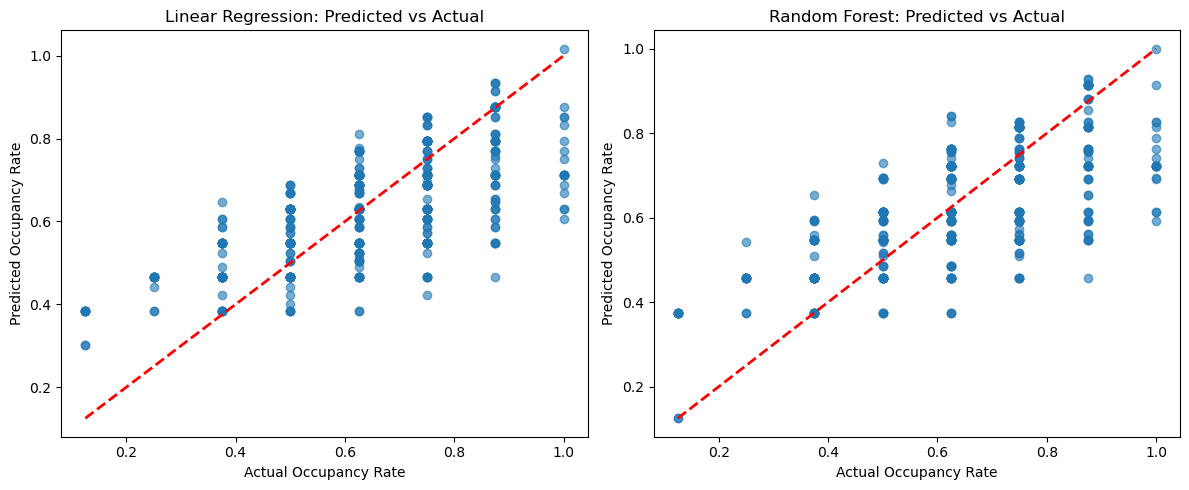

In [32]:
# Predicted vs Actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear Regression
ax1.scatter(y_test, lr_pred, alpha=0.6)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Occupancy Rate')
ax1.set_ylabel('Predicted Occupancy Rate')
ax1.set_title('Linear Regression: Predicted vs Actual')

# Random Forest
ax2.scatter(y_test, rf_pred, alpha=0.6)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Occupancy Rate')
ax2.set_ylabel('Predicted Occupancy Rate')
ax2.set_title('Random Forest: Predicted vs Actual')

plt.tight_layout()
plt.show()

#### Feature Importance Analysis

In [34]:
def analyze_feature_importance(model, feature_names):
    """
    Analyze which features are most important for occupancy prediction
    """
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Feature Importance for Occupancy Prediction:")
    print(feature_importance)
    
    # Plot feature importance
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance in Occupancy Rate Prediction')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return feature_importance

Feature Importance for Occupancy Prediction:
            feature  importance
3      or_7_advance    0.904365
2    is_high_season    0.044890
1  is_weekend_night    0.028654
0    is_holiday_tmr    0.022091


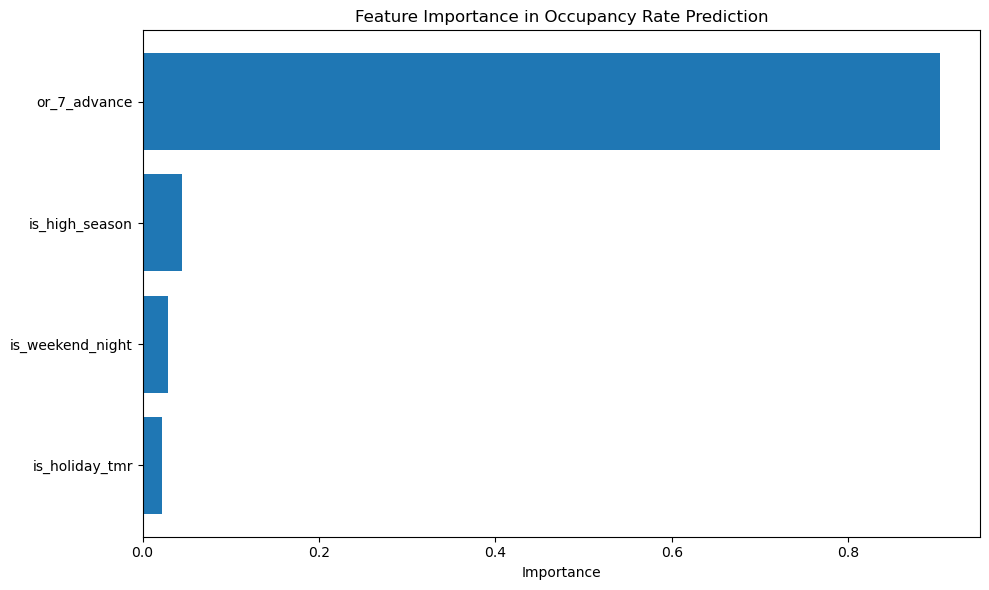

In [35]:
# Analyze importance
feature_importance = analyze_feature_importance(rf_model, feature_names)

#### Try making predictions for the future

In [37]:
# Predictions for the first 7 days of July 2025
new_data = pd.DataFrame({
    'is_holiday_tmr': [0, 0, 0, 0, 0, 0, 0],
    'is_weekend_night': [0, 0, 0, 1, 1, 0, 0],
    'is_high_season': [0, 0, 0, 0, 0, 0, 0],
    'or_7_advance': [5/8, 5/8, 5/8, 3/8, 3/8, 3/8, 3/8]
})

lr_predictions = lr_model.predict(new_data)
rf_predictions = rf_model.predict(new_data)

print("\nSample Predictions:")
for i, (lr_pred, rf_pred) in enumerate(zip(lr_predictions, rf_predictions)):
    print(f"Scenario {i+1}: LR={lr_pred:.3f}, RF={rf_pred:.3f}")


Sample Predictions:
Scenario 1: LR=0.711, RF=0.724
Scenario 2: LR=0.711, RF=0.724
Scenario 3: LR=0.711, RF=0.724
Scenario 4: LR=0.588, RF=0.594
Scenario 5: LR=0.588, RF=0.594
Scenario 6: LR=0.547, RF=0.547
Scenario 7: LR=0.547, RF=0.547


In [38]:
rf_predictions

array([0.72355329, 0.72355329, 0.72355329, 0.59410015, 0.59410015,
       0.54654517, 0.54654517])

# Price Elasticity

In [40]:
def calculate_price_elasticity(historical_data):
    """
    Enhanced price elasticity analysis with proper data cleaning
    """
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    
    # Prepare data with proper cleaning
    data = historical_data.copy()
    
    # Clean the data first
    print("Data cleaning summary:")
    print(f"Original dataset size: {len(data)}")
    
    # Remove rows with zero or negative prices
    data = data[data['avg_price'] > 0]
    print(f"After removing zero/negative prices: {len(data)}")
    
    # Remove rows with zero occupancy (optional - you might want to keep these)
    # data = data[data['occupancy_rate'] > 0]
    
    # Handle zero occupancy rates by adding small constant
    # Use a more appropriate small value (0.001 = 0.1% occupancy)
    min_occupancy = 0.001
    data['occupancy_rate_adj'] = np.maximum(data['occupancy_rate'], min_occupancy)
    
    print(f"Occupancy rate stats after adjustment:")
    print(f"  Min: {data['occupancy_rate_adj'].min():.4f}")
    print(f"  Max: {data['occupancy_rate_adj'].max():.4f}")
    print(f"  Mean: {data['occupancy_rate_adj'].mean():.4f}")
    
    # Create log variables with cleaned data
    data['log_price'] = np.log(data['avg_price'])
    data['log_occupancy'] = np.log(data['occupancy_rate_adj'])
    
    # Check for any remaining invalid values
    if data['log_price'].isna().any() or data['log_occupancy'].isna().any():
        print("Warning: Still have NaN values after cleaning")
        data = data.dropna(subset=['log_price', 'log_occupancy'])
        print(f"After removing NaN: {len(data)}")
    
    # Enhanced features including early demand signal
    features = ['log_price', 'is_weekend_night', 'is_holiday_tmr', 'is_high_season', 'or_7_advance']
    
    # Check if all features exist
    missing_features = [f for f in features if f not in data.columns]
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        features = [f for f in features if f in data.columns]
    
    X = data[features].dropna()
    y = data.loc[X.index, 'log_occupancy']
    
    print(f"Final dataset for elasticity analysis: {len(X)} observations")
    
    if len(X) < 10:
        print("Warning: Very small sample size for elasticity calculation")
        return None
    
    # Fit elasticity model
    elasticity_model = LinearRegression()
    elasticity_model.fit(X, y)
    
    # Calculate model performance
    y_pred = elasticity_model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Extract coefficients
    coefficients = dict(zip(features, elasticity_model.coef_))
    price_elasticity = coefficients['log_price']
    
    # Analyze coefficients
    print("\n=== PRICE ELASTICITY ANALYSIS ===")
    print(f"Model R²: {r2:.4f}")
    print(f"Sample size: {len(X)} observations")
    print("\nCoefficients:")
    for feature, coef in coefficients.items():
        print(f"  {feature}: {coef:.4f}")
    print(f"  Intercept: {elasticity_model.intercept_:.4f}")
    
    # Interpret price elasticity
    print(f"\n=== PRICE ELASTICITY INTERPRETATION ===")
    print(f"Price Elasticity: {price_elasticity:.4f}")
    
    if abs(price_elasticity) > 1.0:
        sensitivity = "HIGHLY ELASTIC"
        pricing_strategy = "Conservative pricing recommended"
        max_price_change = "±10-15%"
    elif abs(price_elasticity) > 0.5:
        sensitivity = "MODERATELY ELASTIC" 
        pricing_strategy = "Standard pricing flexibility"
        max_price_change = "±20-25%"
    else:
        sensitivity = "LOW ELASTICITY"
        pricing_strategy = "Aggressive pricing possible"
        max_price_change = "±30-40%"
    
    print(f"Market Sensitivity: {sensitivity}")
    print(f"Strategy: {pricing_strategy}")
    print(f"Recommended Price Range: {max_price_change}")
    print(f"Interpretation: 1% price increase → {price_elasticity:.2%} occupancy change")
    
    # Return comprehensive results
    elasticity_results = {
        'price_elasticity': price_elasticity,
        'model': elasticity_model,
        'coefficients': coefficients,
        'r2_score': r2,
        'sample_size': len(X),
        'sensitivity_level': sensitivity,
        'max_price_change_pct': max_price_change,
        'features': features,
       # 'data_used': data  # Include cleaned data for reference
    }
    
    return elasticity_results

In [41]:
calculate_price_elasticity(regression_prep)

Data cleaning summary:
Original dataset size: 2362
After removing zero/negative prices: 2358
Occupancy rate stats after adjustment:
  Min: 0.1250
  Max: 1.0000
  Mean: 0.6129
Final dataset for elasticity analysis: 2358 observations

=== PRICE ELASTICITY ANALYSIS ===
Model R²: 0.4406
Sample size: 2358 observations

Coefficients:
  log_price: -0.0500
  is_weekend_night: 0.0749
  is_holiday_tmr: -0.0655
  is_high_season: 0.1267
  or_7_advance: 1.2563
  Intercept: -0.4855

=== PRICE ELASTICITY INTERPRETATION ===
Price Elasticity: -0.0500
Market Sensitivity: LOW ELASTICITY
Strategy: Aggressive pricing possible
Recommended Price Range: ±30-40%
Interpretation: 1% price increase → -5.00% occupancy change


{'price_elasticity': -0.05000219053435878,
 'model': LinearRegression(),
 'coefficients': {'log_price': -0.05000219053435878,
  'is_weekend_night': 0.07491713439464381,
  'is_holiday_tmr': -0.06549548802727292,
  'is_high_season': 0.12667769525587805,
  'or_7_advance': 1.2563417355983366},
 'r2_score': 0.44057633778402006,
 'sample_size': 2358,
 'sensitivity_level': 'LOW ELASTICITY',
 'max_price_change_pct': '±30-40%',
 'features': ['log_price',
  'is_weekend_night',
  'is_holiday_tmr',
  'is_high_season',
  'or_7_advance']}

# For dates and early occupancy input

In [43]:
def generate_future_input(start_date=None, holiday_df=None, num_days=7, or_7_advance_values=None):
    """
    Generate feature data for occupancy prediction
    
    Parameters:
    -----------
    start_date : str or pd.Timestamp, optional
        Starting date for predictions. If None, uses today + 1
    holiday_df : pd.DataFrame
        DataFrame with holiday information (columns: 'Calendar Date', 'Holiday Name')
    num_days : int, default 7
        Number of days to predict
    or_7_advance_values : list or array, optional
        7-day advance occupancy rates. If None, prompts for input
    
    Returns:
    --------
    pd.DataFrame with features for prediction
    """
    
    # Set start date
    if start_date is None:
        start_date = datetime.now().date() + timedelta(days=1)  # Tomorrow
    else:
        start_date = pd.to_datetime(start_date).date()
    
    # Generate date range
    dates = pd.date_range(start=start_date, periods=num_days, freq='D')
    
    # Initialize features DataFrame
    prediction_data = pd.DataFrame({
        'date': dates,
        'is_holiday_tmr': 0,
        'is_weekend_night': 0,
        'is_high_season': 0,
        'or_7_advance': 0.0
    })
    
    # Fill weekend nights (Friday=4, Saturday=5 in weekday())
    prediction_data['is_weekend_night'] = prediction_data['date'].dt.weekday.isin([4, 5]).astype(int)
    
    # Fill holidays (check if tomorrow is a holiday)
    if holiday_df is not None:
        # Ensure holiday dates are datetime
        holiday_df = holiday_df.copy()
        holiday_df['Calendar Date'] = pd.to_datetime(holiday_df['Calendar Date'])
        
        # Check for holidays tomorrow for each date
        for idx, row in prediction_data.iterrows():
            tomorrow = row['date'] + timedelta(days=1)
            is_holiday_tomorrow = tomorrow.date() in holiday_df['Calendar Date'].dt.date.values
            prediction_data.loc[idx, 'is_holiday_tmr'] = int(is_holiday_tomorrow)
    
    # Fill high season
    prediction_data['is_high_season'] = define_high_season(prediction_data['date'])
    
    # Fill or_7_advance values
    if or_7_advance_values is not None:
        if len(or_7_advance_values) != num_days:
            raise ValueError(f"or_7_advance_values must have {num_days} values")
        prediction_data['or_7_advance'] = or_7_advance_values
    else:
        # Interactive input for or_7_advance with fraction support
        print(f"Please enter 7-day advance occupancy rates for {num_days} days:")
        print("(You can enter decimals like 0.625 or fractions like 5/8)")
        
        for idx, row in prediction_data.iterrows():
            date_str = row['date'].strftime('%Y-%m-%d (%A)')
            while True:
                try:
                    user_input = input(f"  {date_str}: ").strip()
                    
                    # Try to parse as fraction first
                    if '/' in user_input:
                        value = float(Fraction(user_input))
                        print(f"    Fraction {user_input} = {value:.3f}")
                    else:
                        # Parse as regular float
                        value = float(user_input)
                    
                    if 0 <= value <= 1:
                        prediction_data.loc[idx, 'or_7_advance'] = value
                        break
                    else:
                        print("    Please enter a value between 0 and 1")
                except (ValueError, ZeroDivisionError):
                    print("    Please enter a valid number or fraction (e.g., 0.625 or 5/8)")
    
    # Display summary
    print(f"\nPrediction data generated for {num_days} days starting {start_date}:")
    display_columns = ['date', 'is_holiday_tmr', 'is_weekend_night', 'is_high_season', 'or_7_advance']
    print(prediction_data[display_columns].to_string(index=False))
    
    return prediction_data

def define_high_season(dates):
    """
    Define high season periods - December, January, February
    """
    high_season = []
    
    for date in dates:
        month = date.month
        
        # High season: December, January, February
        if month in [12, 1, 2]:
            is_high = 1
        else:
            is_high = 0
            
        high_season.append(is_high)
    
    return high_season

In [44]:
def generate_input_next_7_days(holiday_df=holiday, or_7_advance_values=None):
    """Quick function to predict next 7 days"""
    return generate_future_input(
        start_date=None, 
        holiday_df=holiday_df, 
        num_days=7, 
        or_7_advance_values=or_7_advance_values
    )

# Dynamic Pricing Strategy

In [93]:
def elasticity_informed_pricing(predicted_occupancy, or_7_advance_values, base_price, 
                               elasticity_results, market_conditions=None):
    """
    Dynamic pricing strategy informed by calculated price elasticity
    """
    import numpy as np
    
    # Extract elasticity information
    price_elasticity = elasticity_results['price_elasticity']
    coefficients = elasticity_results['coefficients']
    
    print(f"Using price elasticity: {price_elasticity:.4f}")
    
    # Determine pricing bounds based on elasticity
    if abs(price_elasticity) > 1.0:  # Highly elastic
        max_increase = 1.15
        max_decrease = 0.85
        strategy_type = "Conservative"
    elif abs(price_elasticity) > 0.5:  # Moderately elastic
        max_increase = 1.25
        max_decrease = 0.80
        strategy_type = "Standard"
    else:  # Low elasticity
        max_increase = 1.40
        max_decrease = 0.75
        strategy_type = "Aggressive"
    
    recommendations = []
    
    for day, (occupancy_pred, early_demand) in enumerate(zip(predicted_occupancy, or_7_advance_values)):
        
        print(f"\nDay {day+1}: Base occupancy={occupancy_pred:.3f}, Early demand={early_demand:.3f}")
        
        # Calculate optimal multiplier using elasticity model
        def revenue_function(multiplier):
            # Start with the predicted occupancy for this specific day
            base_log_occupancy = np.log(max(occupancy_pred, 0.001))
            
            # Price effect: elasticity * log(price_multiplier)
            price_effect = price_elasticity * np.log(multiplier)
            
            # Early demand effect (if coefficient exists)
            early_demand_effect = 0
            if 'or_7_advance' in coefficients:
                early_demand_effect = coefficients['or_7_advance'] * early_demand
            
            # Weekend effect (assume 0 for optimization, adjust if you have day-specific info)
            weekend_effect = 0
            holiday_effect = 0
            season_effect = 0
            
            # Calculate adjusted log occupancy
            adjusted_log_occupancy = (base_log_occupancy + 
                                    price_effect + 
                                    early_demand_effect +
                                    weekend_effect + 
                                    holiday_effect + 
                                    season_effect)
            
            # Convert back to occupancy rate
            adjusted_occupancy = np.exp(adjusted_log_occupancy)
            adjusted_occupancy = max(0.001, min(1.0, adjusted_occupancy))  # Bound between 0.1% and 100%
            
            # Calculate revenue
            revenue = base_price * multiplier * adjusted_occupancy
            
            return revenue, adjusted_occupancy
        
        # Test different multipliers to find optimal
        multipliers = np.arange(max_decrease, max_increase + 0.01, 0.01)
        revenues = []
        occupancies = []
        
        for mult in multipliers:
            rev, occ = revenue_function(mult)
            revenues.append(rev)
            occupancies.append(occ)
        
        # Find optimal point
        optimal_idx = np.argmax(revenues)
        optimal_multiplier = multipliers[optimal_idx]
        optimal_revenue = revenues[optimal_idx]
        optimal_occupancy = occupancies[optimal_idx]
        
        print(f"  Optimal multiplier: {optimal_multiplier:.3f}")
        print(f"  Expected occupancy: {optimal_occupancy:.3f}")
        print(f"  Expected revenue: ${optimal_revenue:.0f}")
        
        # Rule-based adjustment for different demand levels
        if occupancy_pred >= 0.8:  # High predicted demand
            if optimal_multiplier < 1.1:  # If optimization suggests low price, override
                optimal_multiplier = min(max_increase, 1.2)
                strategy_desc = f"{strategy_type} - High demand override"
            else:
                strategy_desc = f"{strategy_type} - Premium pricing (high demand)"
        elif occupancy_pred >= 0.6:  # Medium predicted demand
            strategy_desc = f"{strategy_type} - Moderate pricing"
        elif occupancy_pred >= 0.4:  # Low-medium predicted demand
            strategy_desc = f"{strategy_type} - Base pricing"
        else:  # Low predicted demand
            if optimal_multiplier > 0.95:  # If optimization suggests high price, override
                optimal_multiplier = max(max_decrease, 0.9)
                strategy_desc = f"{strategy_type} - Low demand override"
            else:
                strategy_desc = f"{strategy_type} - Discount pricing (stimulate demand)"
        
        # Recalculate with final multiplier
        final_revenue, final_occupancy = revenue_function(optimal_multiplier)
        
        recommendations.append({
            'day': day + 1,
            'predicted_base_occupancy': occupancy_pred,
            'early_demand_7d': early_demand,
            'optimal_multiplier': optimal_multiplier,
            'suggested_price': base_price * optimal_multiplier,
            'expected_final_occupancy': final_occupancy,
            'expected_revenue': final_revenue,
            'price_change_pct': f"{(optimal_multiplier - 1) * 100:+.1f}%",
            'strategy': strategy_desc,
            'elasticity_used': price_elasticity
        })
    
    return pd.DataFrame(recommendations)

# Complete Implementation

In [95]:
# Usage with your actual model
def complete_workflow_with_model(historical_data, prediction_data, trained_model, base_price):
    """
    Complete workflow using your trained occupancy prediction model
    """
    
    # Step 1: Calculate elasticity
    elasticity_results = calculate_price_elasticity(historical_data)
    
    # Step 2: Predict occupancy using your model
    feature_cols = ['is_holiday_tmr', 'is_weekend_night', 'is_high_season', 'or_7_advance']
    predicted_occupancy = trained_model.predict(prediction_data[feature_cols])
    
    # Step 3: Generate pricing with elasticity
    pricing_recommendations = elasticity_informed_pricing(
        predicted_occupancy=predicted_occupancy,
        or_7_advance_values=prediction_data['or_7_advance'].values,
        base_price=base_price,
        elasticity_results=elasticity_results
    )
    
    # Add dates
    pricing_recommendations['date'] = prediction_data['date'].dt.strftime('%Y-%m-%d (%A)')
    
    return pricing_recommendations, elasticity_results

# Rull Run
##### Enter the current occupancy rate of the next 7 days

In [101]:
# Calculate elasticity from your historical data
elasticity_results = calculate_price_elasticity(regression_prep)

# Generate prediction data
future_data = generate_input_next_7_days(holiday_df=holiday)

# Generate elasticity-informed pricing recommendations
pricing_recommendations, _ = complete_workflow_with_model(
    historical_data=regression_prep,
    prediction_data=future_data,
    trained_model=rf_model,  # Your trained model
    base_price=620000
)

Data cleaning summary:
Original dataset size: 2362
After removing zero/negative prices: 2358
Occupancy rate stats after adjustment:
  Min: 0.1250
  Max: 1.0000
  Mean: 0.6129
Final dataset for elasticity analysis: 2358 observations

=== PRICE ELASTICITY ANALYSIS ===
Model R²: 0.4406
Sample size: 2358 observations

Coefficients:
  log_price: -0.0500
  is_weekend_night: 0.0749
  is_holiday_tmr: -0.0655
  is_high_season: 0.1267
  or_7_advance: 1.2563
  Intercept: -0.4855

=== PRICE ELASTICITY INTERPRETATION ===
Price Elasticity: -0.0500
Market Sensitivity: LOW ELASTICITY
Strategy: Aggressive pricing possible
Recommended Price Range: ±30-40%
Interpretation: 1% price increase → -5.00% occupancy change
Please enter 7-day advance occupancy rates for 7 days:
(You can enter decimals like 0.625 or fractions like 5/8)


  2025-06-30 (Monday):  1
  2025-07-01 (Tuesday):  1
  2025-07-02 (Wednesday):  0
  2025-07-03 (Thursday):  0
  2025-07-04 (Friday):  5/8


    Fraction 5/8 = 0.625


  2025-07-05 (Saturday):  3/8


    Fraction 3/8 = 0.375


  2025-07-06 (Sunday):  2/8


    Fraction 2/8 = 0.250

Prediction data generated for 7 days starting 2025-06-30:
      date  is_holiday_tmr  is_weekend_night  is_high_season  or_7_advance
2025-06-30               0                 0               0         1.000
2025-07-01               0                 0               0         1.000
2025-07-02               0                 0               0         0.000
2025-07-03               0                 0               0         0.000
2025-07-04               0                 1               0         0.625
2025-07-05               0                 1               0         0.375
2025-07-06               0                 0               0         0.250
Data cleaning summary:
Original dataset size: 2362
After removing zero/negative prices: 2358
Occupancy rate stats after adjustment:
  Min: 0.1250
  Max: 1.0000
  Mean: 0.6129
Final dataset for elasticity analysis: 2358 observations

=== PRICE ELASTICITY ANALYSIS ===
Model R²: 0.4406
Sample size: 2358 observations



In [103]:
print("Elasticity-Informed Pricing Recommendations:")
#print(pricing_recommendations[['date', 'suggested_price', 'expected_final_occupancy','strategy']].to_string(index=False))
pricing_recommendations[['date','predicted_base_occupancy',	'early_demand_7d', 'optimal_multiplier', 'suggested_price', 'expected_final_occupancy','strategy']]

Elasticity-Informed Pricing Recommendations:


,date,predicted_base_occupancy,early_demand_7d,optimal_multiplier,suggested_price,expected_final_occupancy,strategy
0,2025-06-30 (Monday),0.999052,1.000,1.4,868000.0,1.000000,Aggressive - Premium pricing (high demand)
1,2025-07-01 (Tuesday),0.999052,1.000,1.4,868000.0,1.000000,Aggressive - Premium pricing (high demand)
2,2025-07-02 (Wednesday),0.125000,0.000,0.9,558000.0,0.125660,Aggressive - Low demand override
3,2025-07-03 (Thursday),0.125000,0.000,0.9,558000.0,0.125660,Aggressive - Low demand override
4,2025-07-04 (Friday),0.741782,0.625,1.4,868000.0,1.000000,Aggressive - Moderate pricing
5,2025-07-05 (Saturday),0.594100,0.375,1.4,868000.0,0.935753,Aggressive - Base pricing
6,2025-07-06 (Sunday),0.457847,0.250,1.4,868000.0,0.616338,Aggressive - Base pricing
